# Exploring data from the rawg data API
- http://rawg.io/apidocs
- https://api.rawg.io/docs/

API key in file and added to .gitignore to prevent copy to github

In [1]:
import getdata as gd #moving util functions to this module as they are defined

In [85]:
#utility functions to send to module
def my_expand_dict(df, colname):
    """expand a nested dict column into new columns
        
    """
    if colname not in df.columns:
        print(f"'{colname}' is not a valid column in the provided dataframe")
        return None
    return pd.concat([plat_df[colname].apply(pd.Series), plat_df], ignore_index=False, axis=1).drop(colname, axis=1)

def mycollapse(glist, field='name'):
    """ for a field with nested list of dicts, return a str of csv field values
    default field to use is 'name'
    e.g. use this for genres as most of the fields in the nested dicts are not useful
    
    """
    return ", ".join([k['name'] for k in glist])

In [2]:
import requests
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
apinames = """creator-roles
creators
developers
games
genres
platforms
publishers
stores
tags""".splitlines()
apinames

['creator-roles',
 'creators',
 'developers',
 'games',
 'genres',
 'platforms',
 'publishers',
 'stores',
 'tags']

In [4]:
(prevlink, nextlink, count, plat_df) = gd.getfromrawg('platforms','')


count of results: 51


In [5]:
plat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   name              50 non-null     object 
 2   slug              50 non-null     object 
 3   games_count       50 non-null     int64  
 4   image_background  50 non-null     object 
 5   image             0 non-null      object 
 6   year_start        2 non-null      float64
 7   year_end          0 non-null      object 
 8   games             50 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.6+ KB


In [6]:
plat_df = gd.getallplatforms()

count of results: 51
count of results: 51
done getting all results
num
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 0
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                51 non-null     int64 
 1   name              51 non-null     object
 2   slug              51 non-null     object
 3   games_count       51 non-null     int64 
 4   image_background  51 non-null     object
 5   image             0 non-null      object
 6   year_start        2 non-null      object
 7   year_end          0 non-null      object
 8   games             51 non-null     object
dtypes: int64(2), object(7)
memory usage: 4.0+ KB


# get all platforms

In [7]:
(pgs, cnt, df) = gd.getfromrawg2('platforms', '')

In [8]:
(pgs,cnt)

(2, 51)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 0
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                51 non-null     int64 
 1   name              51 non-null     object
 2   slug              51 non-null     object
 3   games_count       51 non-null     int64 
 4   image_background  51 non-null     object
 5   image             0 non-null      object
 6   year_start        2 non-null      object
 7   year_end          0 non-null      object
 8   games             51 non-null     object
dtypes: int64(2), object(7)
memory usage: 4.0+ KB


# search for a game by name

In [10]:
?gd.getfromrawg2

In [215]:
(pgs, cnt, df) = gd.getfromrawg2('games','search=arcraft')
srchgames = df
(pgs, cnt, len(df))

(11, 738, 220)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 19
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   slug                220 non-null    object 
 1   name                220 non-null    object 
 2   playtime            220 non-null    int64  
 3   platforms           220 non-null    object 
 4   stores              186 non-null    object 
 5   released            186 non-null    object 
 6   tba                 220 non-null    bool   
 7   background_image    214 non-null    object 
 8   rating              220 non-null    float64
 9   rating_top          220 non-null    int64  
 10  ratings             220 non-null    object 
 11  ratings_count       220 non-null    int64  
 12  reviews_text_count  220 non-null    int64  
 13  added               220 non-null    int64  
 14  added_by_status     60 non-null     object 
 15  metacritic          19 non-null     object 
 16  suggestio

In [220]:
srchgames['slug'].unique()#search seems to be fuzzy - returns close matches but not exact?

array(['arcraft', 'warcraft-iii-reforged', 'starcraft-remastered',
       'warcraft-orcs-humans', 'world-of-warcraft-cataclysm',
       'world-of-warcraft-legion', 'warcraft-2-battlenet-edition',
       'world-of-warcraft-shadowlands', 'starcraft-2',
       'starcraft-brood-war', 'warcraft-ii-tides-of-darkness',
       'warcraft-3-reign-of-chaos', 'warcraft-3-the-frozen-throne',
       'world-of-warcraft-battle-for-azeroth', 'starcraft',
       'warcraft-2-beyond-the-dark-portal',
       'world-of-warcraft-warlords-of-draenor',
       'world-of-warcraft-mists-of-pandaria',
       'world-of-warcraft-the-burning-crusade',
       'starcraft-ii-wings-of-liberty', 'world-of-warcraft',
       'mycraft-craft-and-build', 'starcraft-ii-heart-of-the-swarm',
       'world-of-warcraft-wrath-of-the-lich-king', 'aircraft-war-x',
       'world-of-warcraft-classic', 'adventure-craft', 'craft-the-world',
       'the-sandbox-evolution-craft-a-2d-pixel-universe-2',
       'tactical-craft-online', 'craft-

In [221]:
df.iloc[1]

slug                                              warcraft-iii-reforged
name                                             Warcraft III: Reforged
playtime                                                              0
platforms             [{'platform': {'id': 4, 'name': 'PC', 'slug': ...
stores                                                             None
released                                                     2020-01-29
tba                                                               False
background_image      https://media.rawg.io/media/games/4e9/4e908c92...
rating                                                             2.17
rating_top                                                            1
ratings               [{'id': 1, 'title': 'skip', 'count': 78, 'perc...
ratings_count                                                       129
reviews_text_count                                                    2
added                                                           

In [226]:
srchgames2 = srchgames.sort_values('metacritic', ascending=False).set_index('id')
srchgames2.head(10)

,slug,name,playtime,platforms,stores,released,tba,background_image,rating,rating_top,...,tags,esrb_rating,user_game,reviews_count,community_rating,saturated_color,dominant_color,short_screenshots,parent_platforms,genres
id,,,,,,,,,,,,,,,,,,,,,
38067,starcraft-ii-wings-of-liberty,StarCraft II: Wings of Liberty,13,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",None,2010-07-27,False,https://media.rawg.io/media/screenshots/b8a/b8...,4.54,5,...,[],"{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",None,194,NaN,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 10, 'name': 'Strategy', 'slug': 'strat..."
22510,starcraft-2,StarCraft II,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",None,2010-07-27,False,https://media.rawg.io/media/games/960/9605c08b...,4.41,5,...,"[{'id': 32, 'name': 'Sci-fi', 'slug': 'sci-fi'...",None,None,510,NaN,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 10, 'name': 'Strategy', 'slug': 'strat..."
23599,world-of-warcraft,World of Warcraft,129,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",None,2004-11-23,False,https://media.rawg.io/media/games/0d9/0d930ea6...,4.30,5,...,"[{'id': 7, 'name': 'Multiplayer', 'slug': 'mul...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",None,542,NaN,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 59, 'name': 'Massively Multiplayer', '..."
30445,warcraft-3-reign-of-chaos,Warcraft 3: Reign of Chaos,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",None,2002-06-01,False,https://media.rawg.io/media/games/667/667b4447...,4.43,5,...,"[{'id': 37796, 'name': 'exclusive', 'slug': 'e...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",None,975,NaN,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 10, 'name': 'Strategy', 'slug': 'strat..."
38218,world-of-warcraft-wrath-of-the-lich-king,World of Warcraft: Wrath of the Lich King,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",None,2008-11-13,False,https://media.rawg.io/media/games/437/437de3c9...,4.40,5,...,[],"{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",None,268,NaN,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 59, 'name': 'Massively Multiplayer', '..."
36850,world-of-warcraft-the-burning-crusade,World of Warcraft: The Burning Crusade,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",None,2007-01-16,False,https://media.rawg.io/media/games/5da/5dac0ce6...,4.35,5,...,[],"{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",None,185,NaN,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 59, 'name': 'Massively Multiplayer', '..."
39685,world-of-warcraft-cataclysm,World of Warcraft: Cataclysm,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",None,2010-12-07,False,https://media.rawg.io/media/games/4b9/4b9b27ac...,3.99,4,...,[],"{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",None,133,NaN,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 59, 'name': 'Massively Multiplayer', '..."
181,hearthstone,Hearthstone,9,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 4, 'name': 'App Store', 'slu...",2014-03-11,False,https://media.rawg.io/media/games/1db/1dbc3d0c...,3.96,4,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",None,439,NaN,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 17, 'name': 'Card', 'slug': 'card'}, {..."
38946,starraft-ii-legacy-of-the-void,StarСraft II: Legacy of the Void,0,"[{'platform': {'id': 4

In [227]:
srchgames2['platforms'].apply(lambda x: x if x is None else [p['platform']['name'] for p in x])

id
38067     [PC, macOS]
22510     [PC, macOS]
23599     [PC, macOS]
30445     [PC, macOS]
38218     [PC, macOS]
             ...     
216418          [iOS]
222681      [Android]
47854       [Android]
233867      [Android]
354365          [iOS]
Name: platforms, Length: 220, dtype: object

### play with search result ratings
- rating level 2 doesn't appear to be used
- rating number is a summary of the values in ratings - maybe?
- 

In [242]:
#pd.DataFrame(srchgames2['ratings'].iloc[2])
#{x['id']: x['title'] for x in srchgames2['ratings'].iloc[2]}

def sratings(r):
    return pd.Series({x['title']: x['id'] for x in r})

def test_sratings():
    return sratings(srchgames2['ratings'].iloc[2])

srchgames2['ratings'].apply(sratings).describe()

<ipython-input-242-d3b869ae3af0>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series({x['title']: x['id'] for x in r})


,exceptional,recommended,meh,skip
count,33.0,36.0,39.0,33.0
mean,5.0,4.0,3.0,1.0
std,0.0,0.0,0.0,0.0
min,5.0,4.0,3.0,1.0
25%,5.0,4.0,3.0,1.0
50%,5.0,4.0,3.0,1.0
75%,5.0,4.0,3.0,1.0
max,5.0,4.0,3.0,1.0


# work with details for a specific game

In [17]:
#https://api.rawg.io/api/games/{id}#need to be able to pass additional info to the url?
(pgs, cnt, df) = gd.getfromrawg2('games/31859','') #trailing slash will break the request

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           1 non-null      object
 1   slug                         1 non-null      object
 2   name                         1 non-null      object
 3   name_original                1 non-null      object
 4   description                  1 non-null      object
 5   metacritic                   1 non-null      object
 6   metacritic_platforms         1 non-null      object
 7   released                     1 non-null      object
 8   tba                          1 non-null      object
 9   updated                      1 non-null      object
 10  background_image             1 non-null      object
 11  background_image_additional  1 non-null      object
 12  website                      1 non-null      object
 13  rating                       1 non-null

In [20]:
df.T.sort_index()

,0
achievements_count,0
added,129
added_by_status,"{'yet': 15, 'owned': 20, 'beaten': 57, 'toplay..."
additions_count,0
alternative_names,[]
background_image,https://media.rawg.io/media/games/60e/60ec0cee...
background_image_additional,https://media.rawg.io/media/screenshots/ed0/ed...
clip,None
creators_count,3
description,<p>A dark future... an uncertain past... no on...


## game platforms

In [22]:
len(df.iloc[0]['platforms'])

3

In [27]:
plat_df = pd.DataFrame(df.iloc[0]['platforms'])
plat_df

,platform,released_at,requirements
0,"{'id': 15, 'name': 'PlayStation 2', 'slug': 'p...",2001-01-29,{}
1,"{'id': 4, 'name': 'PC', 'slug': 'pc', 'image':...",2001-01-29,{}
2,"{'id': 5, 'name': 'macOS', 'slug': 'macos', 'i...",2001-01-29,{}


In [34]:
?pd.concat

In [35]:
pd.concat([plat_df['platform'].apply(pd.Series), plat_df], ignore_index=False, axis=1).drop('platform', axis=1)

,id,name,slug,image,year_end,year_start,games_count,image_background,released_at,requirements
0,15,PlayStation 2,playstation2,None,None,None,1875,https://media.rawg.io/media/screenshots/afc/af...,2001-01-29,{}
1,4,PC,pc,None,None,None,373264,https://media.rawg.io/media/games/83f/83f6f70a...,2001-01-29,{}
2,5,macOS,macos,None,None,None,79791,https://media.rawg.io/media/games/198/1988a337...,2001-01-29,{}


In [41]:

my_expand_dict(plat_df, 'platforms')

'platforms' is not a valid column in the provided dataframe


## game ratings

In [86]:
df.iloc[0]['metacritic']

73

In [97]:
ratings = pd.DataFrame(df.iloc[0]['ratings']).set_index('id').sort_index()
ratings


,title,count,percent
id,,,
1,skip,1,1.56
3,meh,10,15.62
4,recommended,37,57.81
5,exceptional,16,25.00


1.0
10.0
37.0
16.0


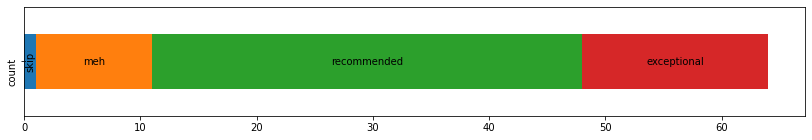

In [199]:
ax = ratings.set_index('title')['count'].to_frame().T.plot.barh(stacked=True,figsize=(14,2))
(handles, labels) = ax.get_legend_handles_labels()
i = iter(labels)
for p in ax.patches:
    #print(p.handles())
    width, height = p.get_width(), p.get_height()
    print(width)
    x, y = p.get_xy() 
    lab = next(i)
    rot = 'vertical' if width < len(lab) else 'horizontal'
    ax.text(x+width/2,y+height/2,lab,horizontalalignment='center', verticalalignment='center', rotation=rot)
ax.tick_params(axis='y', labelrotation=90,)

ax.legend().remove()

In [ ]:
# there are at least 5 rating categories
rating levels = ['skip', 'TBD?', 'meh', 'recommended', 'exceptional']

## game genres
tags might help with genre classification

In [77]:
len(df.iloc[0]['genres'])

4

In [78]:
pd.DataFrame(df.iloc[0]['genres'])

,id,name,slug,games_count,image_background
0,4,Action,action,130325,https://media.rawg.io/media/games/c4b/c4b0cab1...
1,2,Shooter,shooter,43708,https://media.rawg.io/media/games/7a2/7a2500ee...
2,11,Arcade,arcade,22363,https://media.rawg.io/media/games/cfe/cfe114c0...
3,6,Fighting,fighting,8367,https://media.rawg.io/media/games/cc5/cc576aa2...


In [84]:

mycollapse(df.iloc[0]['genres'])

'Action, Shooter, Arcade, Fighting'

### adding a count for columns with nested json dicts

In [59]:
df['stores']

0    []
Name: stores, dtype: object

In [64]:
from collections.abc import Iterable
def mylen(item):
    if isinstance(item, str):
        return 1
    elif isinstance(item, Iterable):
        return len(item)
    else:
        return 1
    
lens = df.iloc[0].apply(mylen)
lens2 = lens[lens >1]
lens2.index = [x+"_ct" for x in lens2.index]

In [75]:
#multi-value columns
lens2

ratings_ct             4
added_by_status_ct     6
parent_platforms_ct    3
platforms_ct           3
genres_ct              4
tags_ct                4
esrb_rating_ct         3
Name: 0, dtype: int64

In [73]:
pd.concat([df, lens2.to_frame().T], axis=1).set_index('id')

,slug,name,name_original,description,metacritic,metacritic_platforms,released,tba,updated,background_image,...,esrb_rating,clip,description_raw,ratings_ct,added_by_status_ct,parent_platforms_ct,platforms_ct,genres_ct,tags_ct,esrb_rating_ct
id,,,,,,,,,,,,,,,,,,,,,
31859,oni,Oni,Oni,<p>A dark future... an uncertain past... no on...,73,"[{'metascore': 73, 'url': 'https://www.metacri...",2001-01-29,False,2021-07-06T15:20:11,https://media.rawg.io/media/games/60e/60ec0cee...,...,"{'id': 3, 'name': 'Teen', 'slug': 'teen'}",None,A dark future... an uncertain past... no one l...,4,6,3,3,4,4,3
